# Linear Regression: CS229
Here some exercises taken from [Stanford CS229](http://cs229.stanford.edu/materials.html) ML classes

## Problem Set #1

### ex.1 : logistic regression
Here only practical exercises are reported. For calculus/algebra-based exercises I usually use my pen and notebook

In [60]:
# import some useful stuff
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
# some numpy practice and toy example on the different components
x = np.array([[1., 1., 2.],
              [1., 3., 4.]])
theta = np.array([4., 5., 6.])
y = np.array([[0.],
             [1.]])

# some "cosmetics" to ease the matrix algebra
theta = theta.reshape(theta.size,1)

print("- basics -")
print(x.shape)
print(theta.shape)
print(y.shape)
print("- (theta)T * x(i)-")
tTx = np.sum(np.transpose(theta)*x, axis=-1)
print(tTx.shape)
print(tTx)
print("- y(i) * (theta)T * x(i) -")
exp = np.transpose(y)*tTx
print(exp.shape)
print(exp)
print("- h(y(i)x(i)) -")
h = 1./(1.+np.exp(-y*np.sum(tTx, axis = -1)))
#yx = np.transpose(y)*x
yx = y*x
print(yx.shape)
hh = 1./(1+np.exp(-np.sum(np.transpose(theta)*yx, axis = -1)))
print(h.shape)
print(h)
print(hh.shape)
print(hh)
print("- gradient -")
g = np.sum( h*y*x, axis = 0)
# it is useful to reshape hh so that the function "h" can be defined only once and
# can operate both on "x" and on "xy", as needed for the Hessian
gg = np.sum( hh.reshape(hh.size,1)*y*x, axis = 0)
print(g.shape)
print(g)
print(gg.shape)
print(gg)
print("- hessian -")
tTx = tTx.reshape(tTx.size,1)
print(tTx)
hx = 1./(1.+np.exp(-np.sum(tTx, axis = -1)))
hx = hx.reshape(hx.size,1)
print(hx.shape)
print(hx)
out_list = []
print(x.shape[0])
for line in range(x.shape[0]):
    print(x[line,:].shape)
    print(x[line,:])
    out_i = np.outer(x[line,:],x[line,:])
    print(out_i.shape)
    print(out_i)
    out_list.append(out_i)
out = np.array(out_list)
print(out.shape)
hes = np.zeros_like(out)
for entry in range(out.shape[0]):
    hes += np.sum( hx[entry] * (1 - hx[entry]) * out[entry,:,:], axis = 0)
print(hes.shape)
print(hes)
realhes = np.sum(hes, axis = 0)
print(realhes.shape)
print(realhes)

a = np.array([0.5])
mat1 = np.array(range(9))
mat1 = mat1.reshape(3,3)
print(mat1)

mat2 = np.array(range(9))
mat2 = mat2.reshape(3,3)

mat1 = a*mat1
mat1 += mat2

print(mat1)


g = np.array([1,1,1])
print(g.shape)

- basics -
(2, 3)
(3, 1)
(2, 1)
- (theta)T * x(i)-
(2,)
[ 21.  43.]
- y(i) * (theta)T * x(i) -
(1, 2)
[[  0.  43.]]
- h(y(i)x(i)) -
(2, 3)
(2, 1)
[[ 0.5]
 [ 1. ]]
(2,)
[ 0.5  1. ]
- gradient -
(3,)
[ 1.  3.  4.]
(3,)
[ 1.  3.  4.]
- hessian -
[[ 21.]
 [ 43.]]
(2, 1)
[[ 1.]
 [ 1.]]
2
(3,)
[ 1.  1.  2.]
(3, 3)
[[ 1.  1.  2.]
 [ 1.  1.  2.]
 [ 2.  2.  4.]]
(3,)
[ 1.  3.  4.]
(3, 3)
[[  1.   3.   4.]
 [  3.   9.  12.]
 [  4.  12.  16.]]
(2, 3, 3)
(2, 3, 3)
[[[  3.03302450e-09   3.03302450e-09   6.06604899e-09]
  [  3.03302450e-09   3.03302450e-09   6.06604899e-09]
  [  3.03302450e-09   3.03302450e-09   6.06604899e-09]]

 [[  3.03302450e-09   3.03302450e-09   6.06604899e-09]
  [  3.03302450e-09   3.03302450e-09   6.06604899e-09]
  [  3.03302450e-09   3.03302450e-09   6.06604899e-09]]]
(3, 3)
[[  6.06604899e-09   6.06604899e-09   1.21320980e-08]
 [  6.06604899e-09   6.06604899e-09   1.21320980e-08]
 [  6.06604899e-09   6.06604899e-09   1.21320980e-08]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[  0.    1

#### a short summary

here define the generalized Newton's method (i.e. the Newton-Raphson method)

$ \theta := \theta - H^{-1}\nabla_{\theta}f(\theta) $

where $H$ is the Hessian and $\nabla_{\theta}$ are the Hessian and the gradient respectively (always calculated wrt/ $\theta$)

Doing all the math, one obtains the following:

$ \frac{\partial}{\partial\theta_k}J(\theta) = -\frac{1}{m}\sum_{i=1}^{m} h_{\theta}({-y^{(i)}x^{(i)}})y^{(i)}x^{(i)}_{k} $

$ H = \frac{1}{m}\sum_{i=1}^{m}h_{\theta}(x^{(i)})(1-h_{\theta}(x^{(i)}))x^{(i)}x^{(i)T} $

where $h_{\theta}(x^{(i)}) = \frac{1}{1 + \exp(-\theta^{T}x^{(i)})}$

In [62]:
# take as input x, y, the initial thetas and the number of iterations and performs minimisation
# x, y and theta are numpy arrays

def htheta(x, theta):
    # htheta stands fot the "h_{\theta}(x)" function
    h = 1./(1+np.exp(-np.sum(np.transpose(theta)*x, axis = -1)))
    # see in the practice cell why it is useful to reshape h
    return h.reshape(h.size,1)

def Hess(x, theta):
    # calculate outer products and store them into matrices
    out_list = []
    for line in range(x.shape[0]):
        out_list.append(np.outer(x[line,:],x[line,:]))
    out = np.array(out_list)
    #print('outer prod')
    #print(out)
    
    # calculate the terms of the sum
    tmp = np.zeros_like(out)
    for entry in range(out.shape[0]):
        tmp[entry] = htheta(x, theta)[entry] * (1 - htheta(x, theta)[entry]) * out[entry,:,:]
    # sum!
    hes = np.sum(tmp, axis = 0)
    return hes

def Newton(x, y, theta, n_iters):
    mm = x.shape[0]
    for i in range(n_iters):
        # grad stands for gradient
        # hess stands for Hessian
        grad = -1./mm * np.sum( htheta(-y*x, theta)*y*x, axis = 0 )
        hess = 1./mm * Hess(x, theta)
        theta = theta - np.linalg.inv(hess).dot(grad)
        #theta.reshape(theta.size,1)
    return theta

In [63]:
# now load data
x = np.loadtxt('../data/CS229_PS1_ex1_logistic_x.txt')
y = np.loadtxt('../data/CS229_PS1_ex1_logistic_y.txt')

## some cosmetics
y_train = y.reshape(y.size, 1)

# add intercept term to x
intercept = np.ones(x.shape[0]).reshape(x.shape[0],1)
x_train = np.hstack((intercept, x))
#x_train = x_train[0:2,:]
#y_train = y_train[0:2,:]
print('x:')
print(x_train.shape)
#print(x_train)

print('y:')
print(y_train.shape)
#print(y_train)

# initialize theta at '0'
theta = np.zeros(x_train.shape[1])
print('theta')
#theta = theta.reshape(x_train.shape[1],1)
print(theta.shape)
#print(theta)

x:
(99, 3)
y:
(99, 1)
theta
(3,)


In [64]:
# now run ...
best_theta = Newton(x_train, y_train, theta, 10)
print(best_theta.shape)
print(best_theta)

(3,)
[-2.6205116   0.76037154  1.17194674]


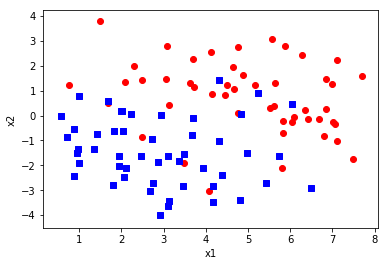

In [79]:
# now plot the data
plt.scatter(x[y==1][:,0],x[y==1][:,1],c='r',marker='o')
plt.scatter(x[y==-1][:,0],x[y==-1][:,1],c='b',marker='s')
plt.xlabel('x1')
plt.ylabel('x2')


The regression is performed with:

$ y = \theta_0 + \theta_{1}x_1 + \theta_{2}x_2 $

so the separation line between the two categories is $ y = 0 $, therefore:

$ x_2 = -\frac{\theta_1}{\theta_2}x_1 -\frac{\theta_0}{\theta_2} $

[-2.6205116   0.76037154  1.17194674]


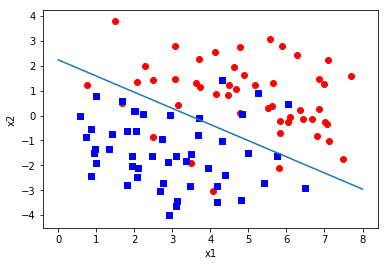

In [85]:
# the scatter plot is copied from above :)
plt.scatter(x[y==1][:,0],x[y==1][:,1],c='r',marker='o')
plt.scatter(x[y==-1][:,0],x[y==-1][:,1],c='b',marker='s')
plt.xlabel('x1')
plt.ylabel('x2')

# now implement the line
print(best_theta)

x1 = range(0,9)
x2 = [-best_theta[1]/best_theta[2]*xx - best_theta[0]/best_theta[2] for xx in x1]
plt.plot(x1, x2)


### ex. 5 : regression for denoising quasar spectra
Quasars have a *light spectrum* (i.e. a flux-vs-wavelenght curve) as follows:
- if $\lambda > \lambda_{L-\alpha}$ : $ f_{obs}(\lambda) = f(\lambda) + noise(\lambda)$

- if $\lambda < \lambda_{L-\alpha}$ : $ f_{obs}(\lambda) = absorption(\lambda) \times f(\lambda) + noise(\lambda)$
 
where $\lambda_{L-\alpha}$ is the Lyman-$\alpha$ wavelenght, $f(\lambda)$ is the emitted light spectrum and $f_{obs}(\lambda)$ is the observed light spectrum.

It is our goal to estimate the spectrum $f$ of an observed quasar

In [1]:
# import useful stuff
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the data (which are in csv format). The files contain:
# - a single header row containing 450 numbers corresponding integral wavelengths in the interval [1150, 1600] angstroms
# - The remaining lines contain relative flux measurements for each wavelength

train_data = np.genfromtxt('../data/CS229_PS1_ex5_quasar_train.csv', delimiter=',')
print(train_data.shape)


(201, 450)


In [3]:
# focus on the first training example, i.e. the first non-header row
x_ex = train_data[0,:].reshape(-1,1)
print(x_ex.shape)
y_ex = train_data[1,:].reshape(-1,1)
print(y_ex.shape)

# add intercept term to x
intercept = np.ones(x_ex.shape[0]).reshape(x_ex.shape[0],1)
x_ex = np.hstack((intercept, x_ex))
print(x_ex.shape)

(450, 1)
(450, 1)
(450, 2)


When expressing the linear regression problem in matrix form, one can take the gradient of the cost function $J(\theta)$ and set it to zero, thus obtaining the **normal equation**:

$ X^{T}X\theta = X^{T}\vec{y} $

and the solution is:

$ \theta = (X^{T}X)^{-1}X^{T}\vec{y} $

Here $X$ is the matrix built putting in each row the $x^(i)$, and $\vec{y}$ is the vector having the $y^{i}$ in each element.

In [4]:
# implement unweighted linear regression using the *normal equation*

# build individual terms
xT_ex = np.transpose(x_ex)
xTx_ex = np.dot(xT_ex, x_ex)

theta = np.dot( np.dot( np.linalg.inv(xTx_ex), xT_ex), y_ex)
print(theta.shape)
print(theta)

(2, 1)
[[  2.51339906e+00]
 [ -9.81122145e-04]]


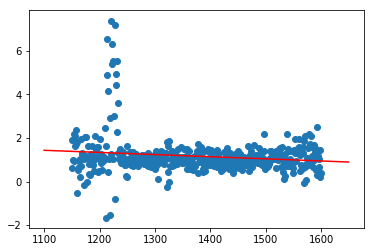

In [5]:
# plot data and straight line from LR (need to ignore the intercept term from x_ex)
plt.scatter(x_ex[:,1], y_ex)

# as in the previous exercise, take the info from theta
# LR: y = theta0 + x*theta1

x_LR = range(1100,1650)
y_LR = [theta[1,0]*xx + theta[0,0] for xx in x_LR]
plt.plot(x_LR, y_LR, c='r')

In [6]:
##### bonus: try to produce an equivalent result with sklearn and its built-in LR
from sklearn.linear_model import LinearRegression

# import the data 
x_train = train_data[0,:].reshape(-1,1)
print(x_train.shape)
y_train = train_data[1,:].reshape(-1,1)
print(y_train.shape)

(450, 1)
(450, 1)


In [7]:
# feed data into the model and fit it

model = LinearRegression()
model.fit(x_train, y_train)

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# retrieve the result: y = m*x + q
m = model.coef_
q = model.intercept_

print(m.shape)
print(q.shape)

print(m)
print(q)
# !!!! it's exactly the same as above (of course .. )

(1, 1)
(1,)
[[-0.00098112]]
[ 2.51339906]


Now implement locally weighted regression (LWR) for the first training example (again).
Use the weights:

$ w_{i} = \exp(-\frac{(x - x^{i})^2}{2\tau^{2}}) $

with $\tau = 5$

The normal equation for LWR is:

$ \theta = (X^{T}WX)^{-1}X^{T}W\vec{y} $

where $W$ is a diagonal matrix with terms $W_{ii} = \frac{1}{2}w_{i}$


In [1]:
# import useful stuff
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
# load the data (which are in csv format). The files contain:
# - a single header row containing 450 numbers corresponding integral wavelengths in the interval [1150, 1600] angstroms
# - The remaining lines contain relative flux measurements for each wavelength

train_data = np.genfromtxt('../data/CS229_PS1_ex5_quasar_train.csv', delimiter=',')
print(train_data.shape)

(201, 450)


In [3]:
# focus on the first training example, i.e. the first non-header row
x_ex = train_data[0,:].reshape(-1,1)
print(x_ex.shape)
y_ex = train_data[1,:].reshape(-1,1)
print(y_ex.shape)

(450, 1)
(450, 1)


In [8]:
# strategy: for each point in the training dataset, fit the whole thing with weights
def getLWR(x, y, tau):
    """
    'x' and 'y' are the training sample and its responses respectively.
    """
    
    # check
    if x.shape[0] != y.shape[0]:
        print('ERROR: x and y have to be of the same lenght')
        return
    
    # here store the regression
    yhat = np.zeros(y.shape)
    
    # for each entry in (x,y) run the full local regression
    # -- this means that the current element has to be removed from the arrays!
    for entry in range(x.shape[0]):
        this_x = x[entry].reshape(-1,1)
        this_y = y[entry].reshape(-1,1)
        
        rest_x = np.delete(x, entry).reshape(-1,1)
        rest_y = np.delete(y, entry).reshape(-1,1)
                
        # add intercept term to x and dump it into X (matrix)
        intercept = np.ones(rest_x.shape[0]).reshape(rest_x.shape[0],1)
        rest_X = np.hstack((intercept, rest_x))
        #print('---- rest_X')
        #print(rest_X)
        
        w_i = np.zeros(rest_y.shape)
        
        # get the weights
        for i in range(rest_x.shape[0]):
            w_i[i] = math.exp(-.5 * (this_x[0] - rest_x[i])**2 / tau**2)
        #w_i = np.ones(rest_y.shape)
        # turn w_i into a diagonal matrix with Wii = .5*w_i
        W = np.diag((.5*w_i).reshape(-1))
        
        # use the normal equation
        X = rest_X
        
        XT = np.transpose(X)
        XTWX = np.dot( np.dot(XT, W), X)
        XTWy = np.dot( np.dot(XT, W), rest_y)
        theta_i = np.dot(np.linalg.inv(XTWX), XTWy)
        
        # add intercept term to x and dump it into X (matrix)
        intercept = np.ones(this_x.shape[0]).reshape(this_x.shape[0],1)
        this_X = np.hstack((intercept, this_x))
        
        yhat[entry] = np.sum(np.transpose(theta_i) * this_X)
    
    return yhat

In [9]:
pred = getLWR(x_ex, y_ex, 5)

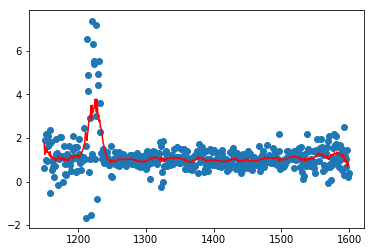

In [10]:
# plot the data
plt.scatter(x_ex, y_ex)

# plot the LWR
plt.plot(x_ex, pred, c = 'r')

In [14]:
# test different values of tau
taus = [1, 5, 10, 100, 1000]
yhat_list = []
for tau in taus:
    yhat_list.append(getLWR(x_ex, y_ex, tau))

5


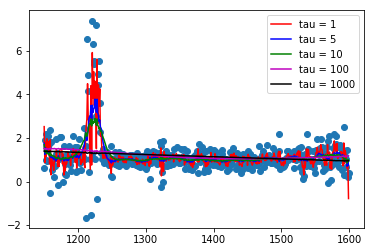

In [16]:
print(len(yhat_list))

# and plot them with different colors
# -- need to work on comsetics here
color_list = ['r','b','g','m','k']
plt.scatter(x_ex, y_ex)
for idx in range(len(yhat_list)):
    col = color_list[idx]
    yyy = yhat_list[idx]
    tau = taus[idx]
    plt.plot(x_ex, yyy, c=col, label='tau = '+str(tau))
plt.legend(loc='best')